In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
results1 = pd.read_csv('participant_id_test1.csv')
results2 = pd.read_csv('participant_id_test2.csv')

In [35]:
results = pd.concat([results1,results2])
results

,model,eeg_feature,remove_global_connections,remove_baseline_signal_noise_removal,number_test_targets,batch_size,hidden_channels,learning_rate,dropout_rate,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params
0,GraphConv,wav,False,False,10,4,16,0.0001,0.0,2.552126,0.965625,0.965625,0.965625,0.965625,0.998306,9005
1,GraphConv,wav,False,False,10,16,16,0.0001,0.0,2.522591,0.996875,0.996875,0.996875,0.996875,0.999990,9005
2,GraphConv,wav,False,False,10,4,16,0.0001,0.2,2.552032,0.965625,0.965625,0.965625,0.965625,0.999486,9005
3,GraphConv,wav,False,False,10,16,16,0.0001,0.2,2.551805,0.965625,0.965625,0.965625,0.965625,0.999980,9005
4,GraphConv,wav,False,False,10,4,16,0.0001,0.4,2.613653,0.903125,0.903125,0.903125,0.903125,0.987097,9005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,GRU,psd,False,False,34,16,128,0.0090,0.0,2.726481,0.799632,0.799632,0.799632,0.799632,0.986741,892576
968,GRU,psd,False,False,34,4,128,0.0090,0.2,3.386927,0.111213,0.111213,0.111213,0.111213,0.695825,892576
969,GRU,psd,False,False,34,16,128,0.0090,0.2,2.664758,0.858456,0.858456,0.858456,0.858456,0.992802,892576
970,GRU,psd,False,False,34,4,128,0.0090,0.4,3.440629,0.097426,0.097426,0.097426,0.097426,0.607034,892576


In [36]:
del results["remove_global_connections"]
del results["remove_baseline_signal_noise_removal"]

In [9]:
models = ['GraphConv','GatedGraphConv','GCN','MLP','CNN','GRU']

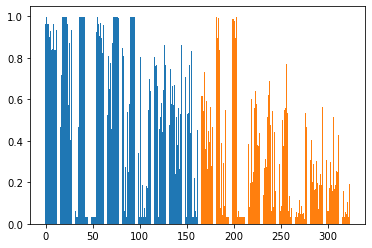

Ttest_indResult(statistic=9.006421131920511, pvalue=1.911149233487646e-17)


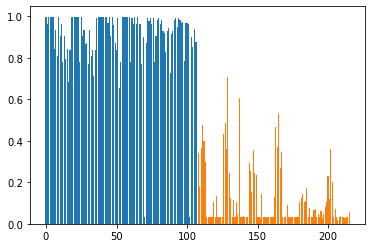

Ttest_indResult(statistic=39.01899084840211, pvalue=2.9789645906960228e-99)


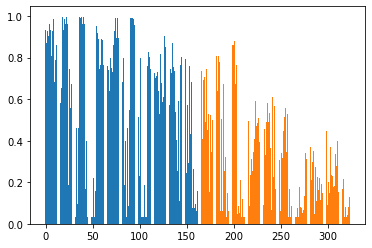

Ttest_indResult(statistic=10.492162301595839, pvalue=2.3924232662745333e-22)


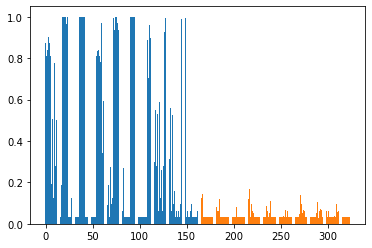

Ttest_indResult(statistic=11.405446376189014, pvalue=1.5466688153988552e-25)


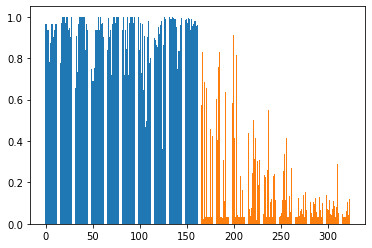

Ttest_indResult(statistic=39.8617137406567, pvalue=1.4821755788511467e-126)


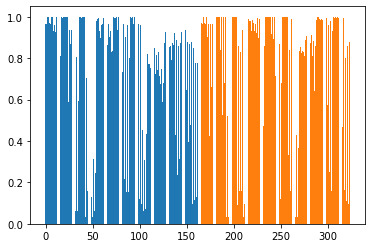

Ttest_indResult(statistic=-0.5328430251443925, pvalue=0.5945097782797021)


In [17]:
for model_name in models:
    wav_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'wav')]
    wav_results_acc = wav_results.test_acc.to_numpy()

    psd_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'psd')]
    psd_results_acc = psd_results.test_acc.to_numpy()
    
    plt.bar(np.arange(0,len(wav_results_acc)), wav_results_acc)
    plt.bar(np.arange(len(psd_results_acc), 2* len(psd_results_acc)), psd_results_acc)
    plt.show()
    
    print(stats.ttest_ind(wav_results_acc,psd_results_acc))

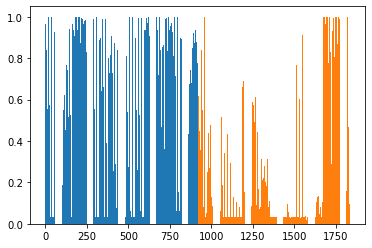

Ttest_indResult(statistic=25.28747072915297, pvalue=2.757205732641998e-121)


In [15]:
wav_results = results[results["eeg_feature"] == 'wav']
wav_results_acc = wav_results.test_acc.to_numpy()

psd_results = results[results["eeg_feature"] == 'psd']
psd_results_acc = psd_results.test_acc.to_numpy()

plt.bar(np.arange(0,len(wav_results_acc)), wav_results_acc)
plt.bar(np.arange(len(psd_results_acc), 2* len(psd_results_acc)), psd_results_acc)
plt.show()

print(stats.ttest_ind(wav_results_acc,psd_results_acc))

GraphConv
Mean test accuracy (Overall): 0.45470924866860324
Mean test accuracy (WE): 0.6103239984265311
Mean test accuracy (PSD): 0.29909449891067535
Max test accuracy (Overall): 0.9989583333333332
Max test accuracy (WE): 0.9989583333333332
Max test accuracy (PSD): 0.996875


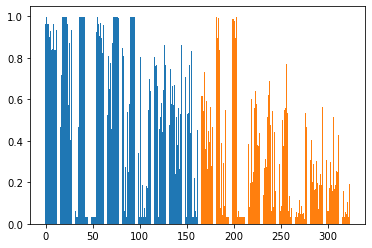

Ttest_indResult(statistic=9.006421131920511, pvalue=1.911149233487646e-17)
GatedGraphConv
Mean test accuracy (Overall): 0.5178836465141612
Mean test accuracy (WE): 0.9104705655410312
Mean test accuracy (PSD): 0.1252967274872912
Max test accuracy (Overall): 0.9989583333333332
Max test accuracy (WE): 0.9989583333333332
Max test accuracy (PSD): 0.709375


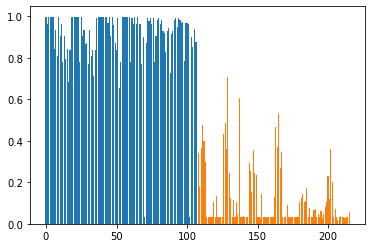

Ttest_indResult(statistic=39.01899084840211, pvalue=2.9789645906960228e-99)
GCN
Mean test accuracy (Overall): 0.4622581169813603
Mean test accuracy (WE): 0.6245620007262164
Mean test accuracy (PSD): 0.29995423323650444
Max test accuracy (Overall): 0.996875
Max test accuracy (WE): 0.996875
Max test accuracy (PSD): 0.9125


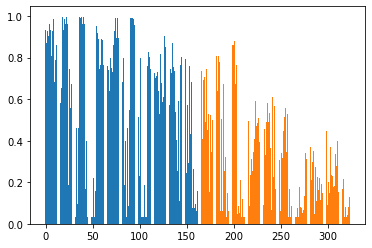

Ttest_indResult(statistic=10.492162301595839, pvalue=2.3924232662745333e-22)
MLP
Mean test accuracy (Overall): 0.22780690208182033
Mean test accuracy (WE): 0.41001800411522626
Mean test accuracy (PSD): 0.045595800048414424
Max test accuracy (Overall): 1.0
Max test accuracy (WE): 1.0
Max test accuracy (PSD): 0.278125


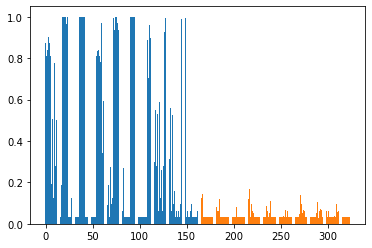

Ttest_indResult(statistic=11.405446376189014, pvalue=1.5466688153988552e-25)
CNN
Mean test accuracy (Overall): 0.5429659132171387
Mean test accuracy (WE): 0.9182480785524085
Mean test accuracy (PSD): 0.16768374788186877
Max test accuracy (Overall): 1.0
Max test accuracy (WE): 1.0
Max test accuracy (PSD): 0.909375


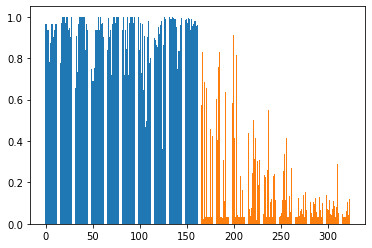

Ttest_indResult(statistic=39.8617137406567, pvalue=1.4821755788511467e-126)
GRU
Mean test accuracy (Overall): 0.7604819126724763
Mean test accuracy (WE): 0.7513056765916243
Mean test accuracy (PSD): 0.7696581487533285
Max test accuracy (Overall): 1.0
Max test accuracy (WE): 1.0
Max test accuracy (PSD): 1.0


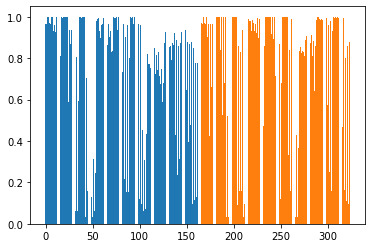

Ttest_indResult(statistic=-0.5328430251443925, pvalue=0.5945097782797021)


In [25]:
for model_name in models:
    print(model_name)
    
    model_results = results[results["model"] == model_name]
    model_results_acc = model_results.test_acc.to_numpy()
    
    wav_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'wav')]
    wav_results_acc = wav_results.test_acc.to_numpy()

    psd_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'psd')]
    psd_results_acc = psd_results.test_acc.to_numpy()
    
    print(f'Mean test accuracy (Overall): {model_results_acc.mean()}')    
    print(f'Mean test accuracy (WE): {wav_results_acc.mean()}')   
    print(f'Mean test accuracy (PSD): {psd_results_acc.mean()}')   
    print(f'Max test accuracy (Overall): {model_results_acc.max()}')    
    print(f'Max test accuracy (WE): {wav_results_acc.max()}')   
    print(f'Max test accuracy (PSD): {psd_results_acc.max()}')   
    
    
    
    plt.bar(np.arange(0,len(wav_results_acc)), wav_results_acc)
    plt.bar(np.arange(len(psd_results_acc), 2* len(psd_results_acc)), psd_results_acc)
    plt.show()
    
    print(stats.ttest_ind(wav_results_acc,psd_results_acc))
    
#     print(stats.ttest_ind(wav_results_acc,psd_results_acc))

In [28]:
for model_name in models:
    print(model_name)
    
    model_results = results[results["model"] == model_name]
    model_results_params = model_results.pytorch_total_params.to_numpy()
    
    print(np.unique(model_results_params))
    
    
#     print(stats.ttest_ind(wav_results_acc,psd_results_acc))

GraphConv
[  9005   9072  97325  97584 358445 358960]
GatedGraphConv
[ 98797  98800 394157 394160]
GCN
[  6605   6640  81581  81712 310573 310832]
MLP
[ 486544  617616 1976800 2501088 4035488 5084064]
CNN
[ 15421  15424  61549  61552 123053 123056]
GRU
[ 17712  22000 193632 241504 714912 892576]


GraphConv
Mean test accuracy (Overall): 0.45470924866860324
Mean test accuracy (WE): 0.572831563180828
Mean test accuracy (PSD): 0.20353349673202606
Max test accuracy (Overall): 0.9989583333333332
Max test accuracy (WE): 0.96875
Max test accuracy (PSD): 0.5625


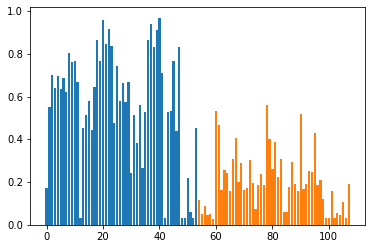

Ttest_indResult(statistic=9.013195087810914, pvalue=9.307829017006315e-15)
GatedGraphConv
Mean test accuracy (Overall): 0.5178836465141612
Mean test accuracy (WE): 0.907858455882353
Mean test accuracy (PSD): 0.07947814542483657
Max test accuracy (Overall): 0.9989583333333332
Max test accuracy (WE): 0.9944852941176472
Max test accuracy (PSD): 0.3612132352941176


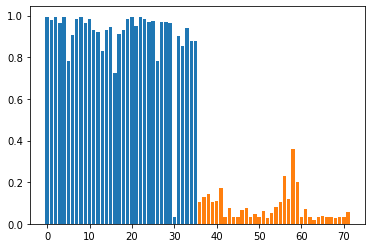

Ttest_indResult(statistic=27.759684889500143, pvalue=1.6367221838037613e-39)
GCN
Mean test accuracy (Overall): 0.4622581169813603
Mean test accuracy (WE): 0.6119961873638345
Mean test accuracy (PSD): 0.19764433551198252
Max test accuracy (Overall): 0.996875
Max test accuracy (WE): 0.9053308823529412
Max test accuracy (PSD): 0.4466911764705882


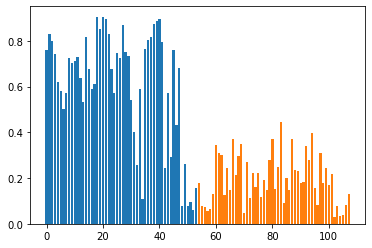

Ttest_indResult(statistic=11.241155674846247, pvalue=8.943925774709193e-20)
MLP
Mean test accuracy (Overall): 0.22780690208182033
Mean test accuracy (WE): 0.4386574074074074
Mean test accuracy (PSD): 0.04440699891067537
Max test accuracy (Overall): 1.0
Max test accuracy (WE): 0.9954044117647058
Max test accuracy (PSD): 0.1369485294117647


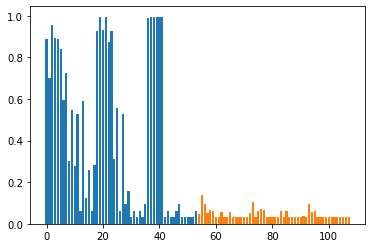

Ttest_indResult(statistic=7.3246332936793, pvalue=4.905306896203641e-11)
CNN
Mean test accuracy (Overall): 0.5429659132171387
Mean test accuracy (WE): 0.9367851307189542
Mean test accuracy (PSD): 0.08055895969498905
Max test accuracy (Overall): 1.0
Max test accuracy (WE): 0.9990808823529412
Max test accuracy (PSD): 0.2876838235294117


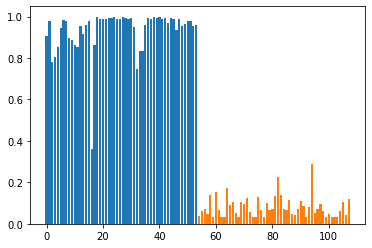

Ttest_indResult(statistic=55.214809250181474, pvalue=6.19668635650586e-80)
GRU
Mean test accuracy (Overall): 0.7604819126724763
Mean test accuracy (WE): 0.7405875544662308
Mean test accuracy (PSD): 0.822882625272331
Max test accuracy (Overall): 1.0
Max test accuracy (WE): 0.9512867647058824
Max test accuracy (PSD): 0.9990808823529412


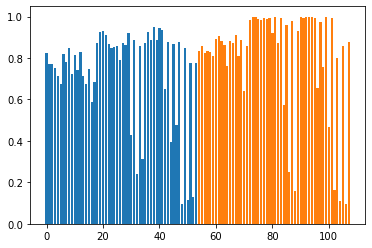

Ttest_indResult(statistic=-1.8427310406512039, pvalue=0.06816286248200001)


In [30]:
for model_name in models:
    print(model_name)
    
    model_results = results[results["model"] == model_name]
    model_results_acc = model_results.test_acc.to_numpy()
    
    wav_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'wav') & (results["number_test_targets"] == 34)]
    wav_results_acc = wav_results.test_acc.to_numpy()

    psd_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'psd') & (results["number_test_targets"] == 34)]
    psd_results_acc = psd_results.test_acc.to_numpy()
    
    print(f'Mean test accuracy (Overall): {model_results_acc.mean()}')    
    print(f'Mean test accuracy (WE): {wav_results_acc.mean()}')   
    print(f'Mean test accuracy (PSD): {psd_results_acc.mean()}')   
    print(f'Max test accuracy (Overall): {model_results_acc.max()}')    
    print(f'Max test accuracy (WE): {wav_results_acc.max()}')   
    print(f'Max test accuracy (PSD): {psd_results_acc.max()}')   
    
    
    
    plt.bar(np.arange(0,len(wav_results_acc)), wav_results_acc)
    plt.bar(np.arange(len(psd_results_acc), 2* len(psd_results_acc)), psd_results_acc)
    plt.show()
    
    print(stats.ttest_ind(wav_results_acc,psd_results_acc))
    
#     print(stats.ttest_ind(wav_results_acc,psd_results_acc))

GraphConv
Mean test accuracy (16 hidden channels): 0.5416076615831519
> 95% test accuracy (16 hidden channels): 10
Mean test accuracy (64 hidden channels): 0.4751157407407406
> 95% test accuracy (64 hidden channels): 17
Mean test accuracy (128 hidden channels): 0.34740434368191725
> 95% test accuracy (128 hidden channels): 18


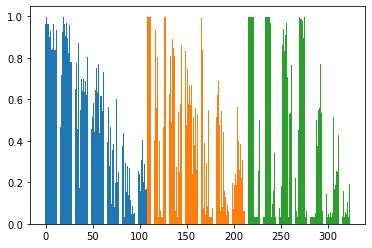

GatedGraphConv
Mean test accuracy (64 hidden channels): 0.517771309912854
> 95% test accuracy (64 hidden channels): 30
Mean test accuracy (128 hidden channels): 0.5179959831154685
> 95% test accuracy (128 hidden channels): 30


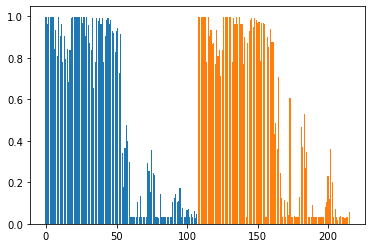

GCN
Mean test accuracy (16 hidden channels): 0.563719816630356
> 95% test accuracy (16 hidden channels): 3
Mean test accuracy (64 hidden channels): 0.4764115831517792
> 95% test accuracy (64 hidden channels): 7
Mean test accuracy (128 hidden channels): 0.3466429511619462
> 95% test accuracy (128 hidden channels): 11


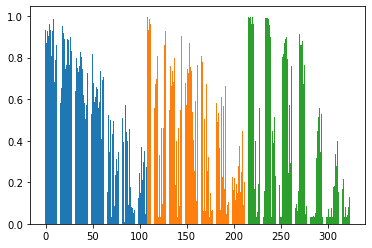

MLP
Mean test accuracy (16 hidden channels): 0.2707255355846042
> 95% test accuracy (16 hidden channels): 2
Mean test accuracy (64 hidden channels): 0.216757443718228
> 95% test accuracy (64 hidden channels): 12
Mean test accuracy (128 hidden channels): 0.1959377269426289
> 95% test accuracy (128 hidden channels): 18


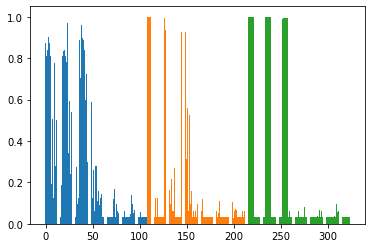

CNN
Mean test accuracy (16 hidden channels): 0.5488068491285402
> 95% test accuracy (16 hidden channels): 24
Mean test accuracy (64 hidden channels): 0.5502433959694989
> 95% test accuracy (64 hidden channels): 36
Mean test accuracy (128 hidden channels): 0.5298474945533769
> 95% test accuracy (128 hidden channels): 36


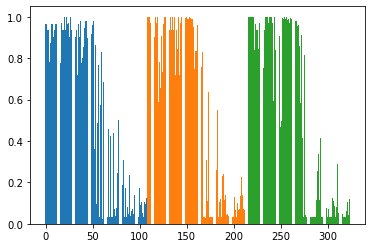

GRU
Mean test accuracy (16 hidden channels): 0.8755560094408134
> 95% test accuracy (16 hidden channels): 42
Mean test accuracy (64 hidden channels): 0.7856050290486566
> 95% test accuracy (64 hidden channels): 46
Mean test accuracy (128 hidden channels): 0.6202846995279593
> 95% test accuracy (128 hidden channels): 38


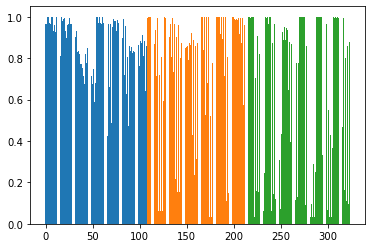

In [47]:
hidden_channels = [16, 64 ,128]
for model_name in models:
    print(model_name)
    idx = 0 
    for hc in hidden_channels:
    
        hc_results = results[(results["model"] == model_name) & (results["hidden_channels"] == hc)]
        hc_results_acc = hc_results.test_acc.to_numpy()
        if len(hc_results_acc) != 0:
            print(f'Mean test accuracy ({hc} hidden channels): {hc_results_acc.mean()}')  
            print(f'> 95% test accuracy ({hc} hidden channels): {(hc_results_acc > 0.95).sum()}') 
            plt.bar(np.arange(idx,idx+len(hc_results_acc)), hc_results_acc)
            idx += len(hc_results_acc)
    plt.show()

#     psd_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'psd') & (results["number_test_targets"] == 34)]
#     psd_results_acc = psd_results.test_acc.to_numpy()
    
      
#     print(f'Mean test accuracy (WE): {wav_results_acc.mean()}')   
#     print(f'Mean test accuracy (PSD): {psd_results_acc.mean()}')   
#     print(f'Max test accuracy (Overall): {model_results_acc.max()}')    
#     print(f'Max test accuracy (WE): {wav_results_acc.max()}')   
#     print(f'Max test accuracy (PSD): {psd_results_acc.max()}')   
    
    
    
#     
#     plt.bar(np.arange(len(psd_results_acc), 2* len(psd_results_acc)), psd_results_acc)
#     plt.show()
    
#     print(stats.ttest_ind(wav_results_acc,psd_results_acc))

In [21]:
results

,model,eeg_feature,number_test_targets,batch_size,hidden_channels,learning_rate,dropout_rate,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params
0,GraphConv,wav,10,4,16,0.0001,0.0,2.552126,0.965625,0.965625,0.965625,0.965625,0.998306,9005
1,GraphConv,wav,10,16,16,0.0001,0.0,2.522591,0.996875,0.996875,0.996875,0.996875,0.999990,9005
2,GraphConv,wav,10,4,16,0.0001,0.2,2.552032,0.965625,0.965625,0.965625,0.965625,0.999486,9005
3,GraphConv,wav,10,16,16,0.0001,0.2,2.551805,0.965625,0.965625,0.965625,0.965625,0.999980,9005
4,GraphConv,wav,10,4,16,0.0001,0.4,2.613653,0.903125,0.903125,0.903125,0.903125,0.987097,9005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,GRU,psd,34,16,128,0.0090,0.0,2.726481,0.799632,0.799632,0.799632,0.799632,0.986741,892576
968,GRU,psd,34,4,128,0.0090,0.2,3.386927,0.111213,0.111213,0.111213,0.111213,0.695825,892576
969,GRU,psd,34,16,128,0.0090,0.2,2.664758,0.858456,0.858456,0.858456,0.858456,0.992802,892576
970,GRU,psd,34,4,128,0.0090,0.4,3.440629,0.097426,0.097426,0.097426,0.097426,0.607034,892576


In [90]:
f1 = open("test1_log.txt", "r")
f2 = open("test2_log.txt", "r")

lines = f1.readlines()
lines2 = f2.readlines()

lines.extend(lines2)

next_is_log = False
times = {}
for line in lines:
#     print(line)
    if next_is_log:
        next_is_log = False
        time = float(line.split('Training time (s): ')[1].split('n')[0][:-1])
#         print(time)
        if model in times.keys():
            times[model].append(time)
        else:
            times[model] = [time]
    elif "-hc 64" in line or "-hc 128" in line:
        model = line.split('-m ')[1].split(' ')[0]
#         print(model)
        next_is_log = True

In [87]:
for key in times.keys():
    a = times[key]
    a = np.array(a)
    print(key, a.mean())

GraphConv 33.41875
GatedGraphConv 29.559305555555557
GCN 59.14625000000001
MLP 11.40152777777778
CNN 26.339074074074073
GRU 85.15287037037037


In [107]:
f1 = open("test1_log.txt", "r")
f2 = open("test2_log.txt", "r")

lines = f1.readlines()
lines2 = f2.readlines()

lines.extend(lines2)

next_is_log = False
epochs = {}
for line in lines:
#     print(line)
    if next_is_log:
        next_is_log = False
        time = int(line.split('Total epochs: ')[1].split(' ')[0])
#         time = 1
        print(time)
        if model in epochs.keys():
            epochs[model].append(time)
        else:
            epochs[model] = [time]
    elif "-hc" in line or "-hc 128" in line:
        model = line.split('-m ')[1].split(' ')[0]
#         print(model)
        next_is_log = True

211
542
194
302
309
500
139
103
78
88
49
162
33
135
49
82
59
49
161
426
92
186
98
183
38
54
32
45
53
49
31
35
35
31
31
34
67
174
65
112
99
102
31
31
31
31
31
37
31
31
31
31
31
31
420
1743
568
1016
869
1438
104
443
99
197
85
93
74
70
79
119
83
161
217
470
214
381
264
666
69
167
71
72
117
62
36
41
31
45
42
45
155
257
168
237
134
167
31
48
39
59
31
53
31
32
31
31
31
32
727
1629
784
1411
1121
1809
432
399
139
234
99
106
31
148
88
117
76
78
1719
2869
1629
872
736
966
63
194
80
79
105
153
42
99
48
82
42
105
1433
1851
160
1424
622
221
31
98
40
93
59
117
31
31
35
33
31
82
439
461
420
441
265
477
184
194
165
81
71
93
37
175
58
76
32
37
222
329
220
265
158
255
31
101
35
69
31
77
31
36
31
32
31
34
125
234
113
371
239
277
31
31
31
31
31
31
31
31
31
31
31
31
435
182
230
650
492
448
118
185
227
110
83
180
31
44
33
44
46
65
86
196
123
455
397
283
32
118
32
110
35
35
32
31
32
79
33
39
511
220
230
169
235
244
31
35
31
34
33
51
31
33
31
41
31
34
469
291
232
64
296
41
221
289
51
146
104
125
122
119
125
8

IndexError: list index out of range

In [108]:
for key in epochs.keys():
    a = epochs[key]
    a = np.array(a)
    print(key, f'{a.mean():.1f}')

GraphConv 222.0
